<a href="https://colab.research.google.com/github/olodenm/info_2022_olo/blob/Netology_HW/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F_%D0%B8_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<details>
  
  <summary><h1>Описание данных</h1></summary>

####Набор данных с различными столбцами. Сделаем описание для каждого столбца:


>  

1.   <u>Unnamed: 0</u>: идентификатор строки или записи в наборе данных.

2.   <u>Location</u>: Этот столбец указывает на географическое расположение. Он содержит значения, такие как "North" и "South", что означает северное и южное географическое расположение

3.  <u>Town</u>: Этот столбец содержит названия городов.

4. <u>Mortality</u>: Этот столбец представляет собой статистику смертности в каждом городе или населенном пункте.

5. <u>Hardness</u>: Этот столбец указывает на жесткость воды в каждом городе или населенном пункте.

 </details>

In [ ]:
! gdown --id 1Ri8C9AEELl7W2zPZLp7AZ6lJZy37qkEJ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ri8C9AEELl7W2zPZLp7AZ6lJZy37qkEJ
To: /content/water.zip
100% 1.01k/1.01k [00:00<00:00, 3.96MB/s]


In [ ]:
df = pd.read_csv('/content/water.zip')
df # 61 rows × 5 columns

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [ ]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


#Задание 1.
<u>Ответить на вопрос:</u> есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

<Axes: xlabel='hardness', ylabel='mortality'>

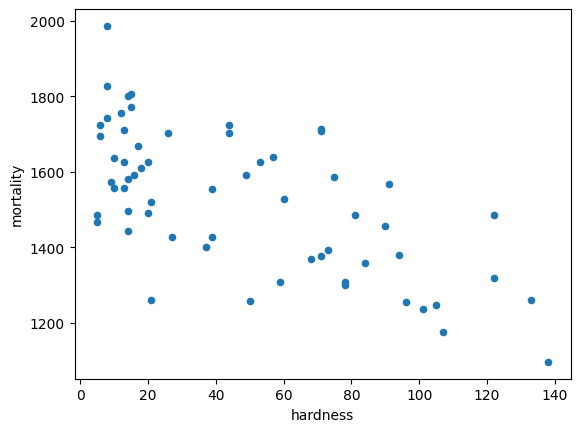

In [ ]:
df.plot(kind='scatter', x='hardness', y='mortality') # Построим точечный график

In [ ]:
df[['hardness', 'mortality']].corr() # Рассчитаем коэффициент корреляции Пирсона
# -0.654849. Указывает на отрицательную корреляцию между жесткостью воды и уровнем смертности.

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
df[['hardness', 'mortality']].corr(method='spearman') # Рассчитаем коэффициент корреляции Спирмена
# -0.631665. Указывает на отрицательную корреляцию между жесткостью воды и уровнем смертности.

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
X = df[['hardness']]
y = df['mortality']

In [ ]:
# Построим модель линейной регрессии
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.coef_ # выходит что при увеличение жоскости воды, смертность уменьшаеться

array([-3.31576799])

In [ ]:
lm.intercept_

1678.9405326885008

In [ ]:
y_pred = lm.predict(X_test)
y_pred

array([1330.78489376, 1645.78285279, 1632.51978083, 1533.04674114,
       1420.31062948, 1612.62517289, 1237.94339004, 1430.25793345,
       1609.3094049 , 1659.04592475, 1483.31022129, 1410.36332551,
       1549.62558108, 1632.51978083, 1443.52100541, 1549.62558108])

In [ ]:
y_test

0     1247
5     1558
46    1495
31    1702
13    1307
55    1625
34    1259
49    1587
12    1519
40    1696
33    1309
59    1485
16    1555
3     1800
53    1709
17    1428
Name: mortality, dtype: int64

In [ ]:
metrics.r2_score(y_test, y_pred)  # Рассчитываем коэффициент детерминации

0.410213439338294

<Axes: xlabel='mortality', ylabel='Count'>

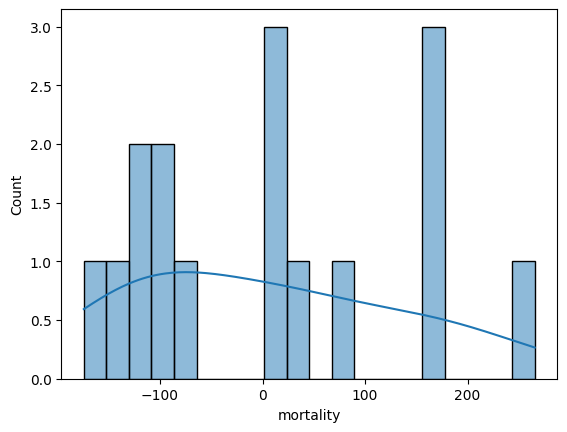

In [ ]:
sns.histplot((y_test-y_pred), kde=True, bins=20) # строим график остатков

##Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:

# Создайте два отдельных Df для South и North
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

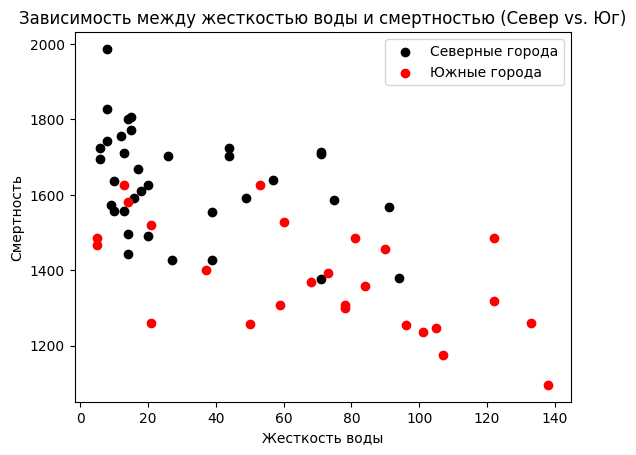

In [ ]:
# Создайте точечный график для северных городов (df_north)
plt.scatter(df_north['hardness'], df_north['mortality'], label='Северные города', color='black')

# Создайте точечный график для южных городов (df_south)
plt.scatter(df_south['hardness'], df_south['mortality'], label='Южные города', color='red')

plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.title('Зависимость между жесткостью воды и смертностью (Север vs. Юг)')
plt.legend()

In [ ]:
df_south[['hardness', 'mortality']].corr(method='pearson') # Рассчитаем коэффициент корреляции Пирсона для Южных

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [ ]:
df_north[['hardness', 'mortality']].corr(method='pearson') # Рассчитаем коэффициент корреляции Пирсона для Северных

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [ ]:
df_south[['hardness', 'mortality']].corr(method='spearman') # Рассчитаем коэффициент корреляции Спирмана для Южных

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
df_north[['hardness', 'mortality']].corr(method='spearman') # Рассчитаем коэффициент корреляции Спирмена для Северных

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
# Для южных городов
X_south = df_south[['hardness']]
y_south = df_south['mortality']

# Для северных городов
X_north = df_north[['hardness']]
y_north = df_north['mortality']

In [ ]:
# Разделение южных городов
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, random_state=42)

# Разделение северных городов
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, random_state=42)

In [ ]:
# Обучаем модель для южных городов
model_south = LinearRegression()
model_south.fit(X_south, y_south)

# Обучаем модель для северных городов
model_north = LinearRegression()
model_north.fit(X_north, y_north)

LinearRegression()

In [ ]:
model_south.coef_ # получаеться так-же, что при увеличение жоскости воды, смертность уменьшаеться

array([-2.09271845])

In [ ]:
model_north.coef_ # значения практические идентичны с югом

array([-1.93134215])

In [ ]:
model_south.intercept_

1522.8150485436895

In [ ]:
model_north.intercept_

1692.312801433099

In [ ]:
y_pred_south = model_south.predict(X_south_test)
y_pred_south

array([1267.50339806, 1512.35145631, 1303.07961165, 1267.50339806,
       1445.38446602, 1478.86796117, 1399.34466019])

In [ ]:
y_south_test

18    1318
38    1486
0     1247
58    1486
27    1402
19    1260
33    1309
Name: mortality, dtype: int64

In [ ]:
metrics.r2_score(y_south_test, y_pred_south) # Получаеться машина совершенно неверно предсказывает значения

-0.8485667858507435

<Axes: xlabel='mortality', ylabel='Count'>

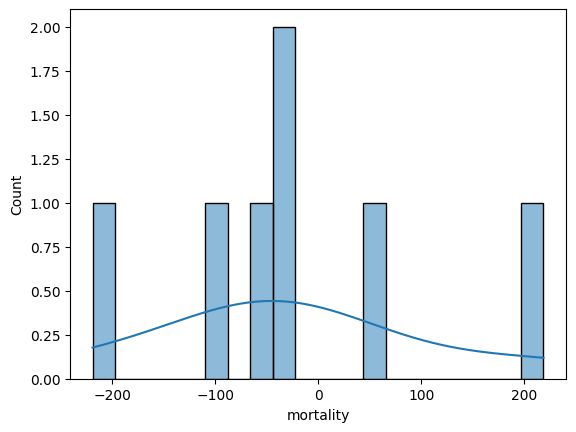

In [ ]:
sns.histplot((y_south_test-y_pred_south), kde=True, bins=20) # строим график остатков юга

In [ ]:
y_pred_north = model_north.predict(X_north_test)
y_pred_north

array([1676.86206421, 1674.93072206, 1665.2740113 , 1680.72474852,
       1661.41132699, 1555.18750861, 1607.33374673, 1676.86206421,
       1616.99045749])

In [ ]:
y_north_test

45    1987
23    1574
43    1444
36    1724
26    1591
50    1713
31    1702
22    1742
16    1555
Name: mortality, dtype: int64

In [ ]:
metrics.r2_score(y_north_test, y_pred_north)  # Для Севера также 50\50

-0.0674509160835528

<Axes: xlabel='mortality', ylabel='Count'>

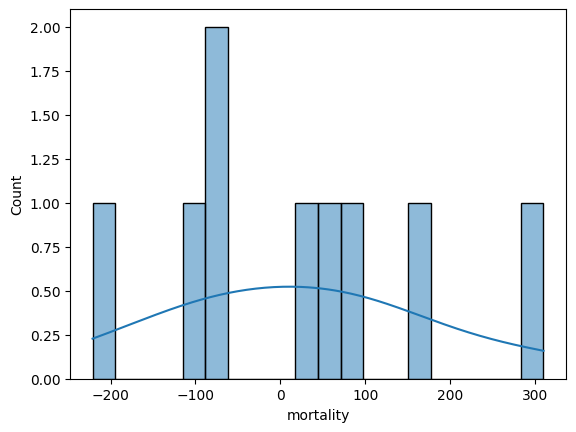

In [ ]:
sns.histplot((y_north_test-y_pred_north), kde=True, bins=20) # строим график остатков севера

Разделив данные на две группы Север и Юг мы увидили ухудшения соответсвтия модели данным:
 - юг=-0.848
 - север=-0.067
 - исходный df = 0.410

Коэфицент линейной регресси, получаеться что в регионах по отдельности, смертность выше при увеличение жоскости воды
 - юг = array([-2.09271845])
 - север = array([-1.93134215])
 - исходный df array([-3.31576799])

Зависимость между жесткостью воды и смертностью схожа как для северных, так и для южных городов, это может указывать на общую тенденцию.